# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# MY ANSWER: The output already shows 150 observations (rows) and 4 features (columns). 
# But the question asks for "code", so please see my code in the following cell.

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
# MY ANSWER (continued):
# Using panda library, where "df.shape" returns the 'dimensions' of the dataframe (rows, columns)
# The 1st element .shape[0] will return the the number of rows, and likewise .shape[1] will return the number of columns from the df. 
print('Number of observations (rows): ',iris_df.shape[0]
      ,'\n'
      ,'Number of variables (columns): ',iris_df.shape[1])

Number of observations (rows):  150 
 Number of variables (columns):  4


#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


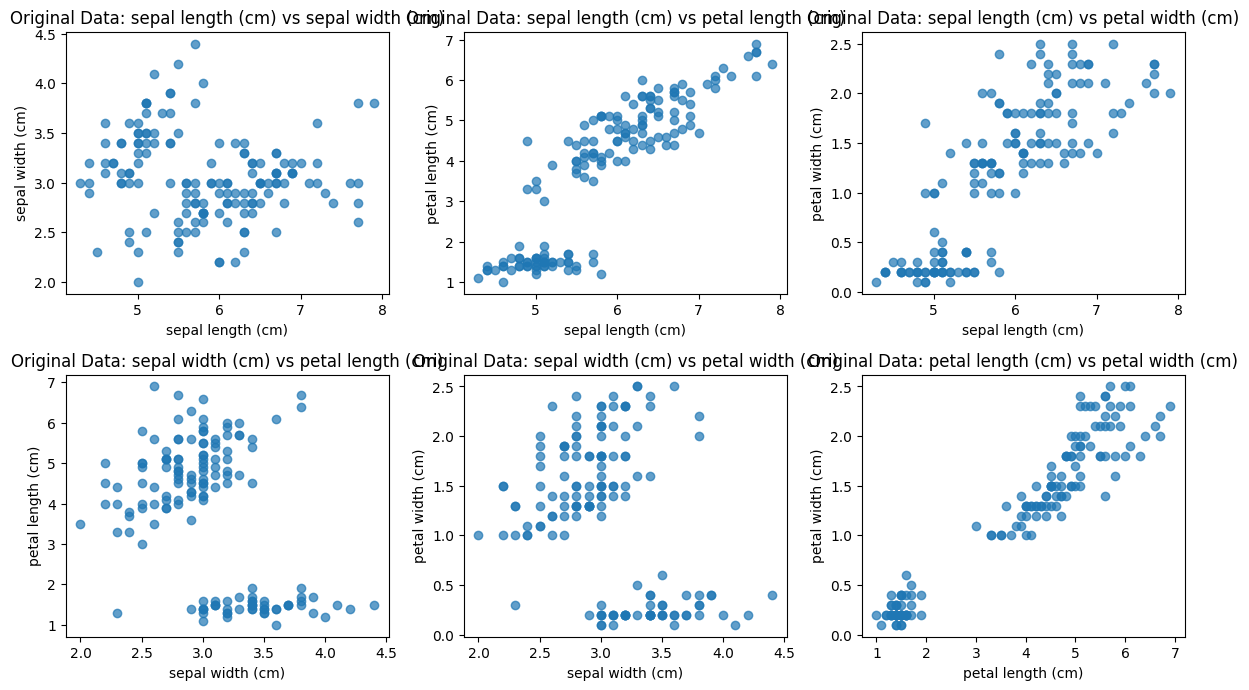

In [4]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> MY ANSWER 

> With my human eyes, I see 2 clusters by figures (width and length) in all graphs, and also 2 different shades of blue overlapping each others within each cluster. 


> As for the clusters by width and length: 

> - short sepal (length) & wide sepal (width) is in one cluster; long sepal (length) & narrow sepal (width) is in another cluster. 

> - short sepal (length) & short petal (length) are in one cluster; long sepal (length) & long petal (length) are in another cluster. 

> - short sepal (length) & narrow petal (width) are in one cluster; long sepal (length) & wide petal (width) are in another cluster. 
     
> - medium-to-wide sepal (width) & short petal (length) are in one cluster; narrow-to-medium sepal (width) *with a few outliers* & long petal (legnth) are in another cluster. 

> - medium-to-wide sepal (width) & narrow petal (width) are in one cluster; narrow-to-medium sepal (width) *with a few outliers* & long petal (legnth) are in another cluster. 

> - short petal (length) & narrow petal (width) are in one cluster; long petal (length) & wide petal (width) are in another cluster. 

    
> Summary: 

> - The ones with PETAL values have clearer clusters by width and length, with the PETAL ONLY graph (petal length & petal width) having the most distinct clusters by these measurements. 

> - 2 different shades of blue overlap within each cluster in all graphs. 

    
    


#### **Question 3:** 
#### Data cleaning

In [5]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> MY ANSWER: 

> In the Iris dataset, the features (length and width of sepal and petal) relatively have the same scale (from 0 to 10), but it is industry standard & best practice to always standardize the features of a dataset before applying a preditive model because features with larger scales (e.g., house prices - in hundreds of thousands of dollars up to billions of dollars) if not standardized will dominate other features (e.g., house age, number of bedrooms), skewing the result. In particular, the K-Means Clustering uses Euclidean distance, if features aren't standardized, the distance calculations will be distored, leading to incorrect clustering. 



#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [6]:
# MY ANSWER - using the UofT DSI's code in notebook "Clustering.ipyn":  

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=12345)
clusters = kmeans.fit(scaled_iris_df)

c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
# MY ANSWER (continued) - using the UofT DSI's code in notebook "Clustering.ipyn":  

# Create a copy of the DataFrame for clustering and modification
standardized_iris_with_clusters = scaled_iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].copy()

# Add cluster labels to the copied DataFrame
standardized_iris_with_clusters['Cluster'] = clusters.labels_

# Display the updated DataFrame with the 'Cluster' column
standardized_iris_with_clusters

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,0
148,0.432165,0.788808,0.933271,1.448832,0


In [51]:
''' MY OBSERVATION: as we can see, there are NEGATIVE lengths and widths after standardization. But, no worries, this is just for clustering. '''

' MY OBSERVATION: as we can see, there are NEGATIVE lengths and widths after standardization. But, no worries, this is just for clustering. '

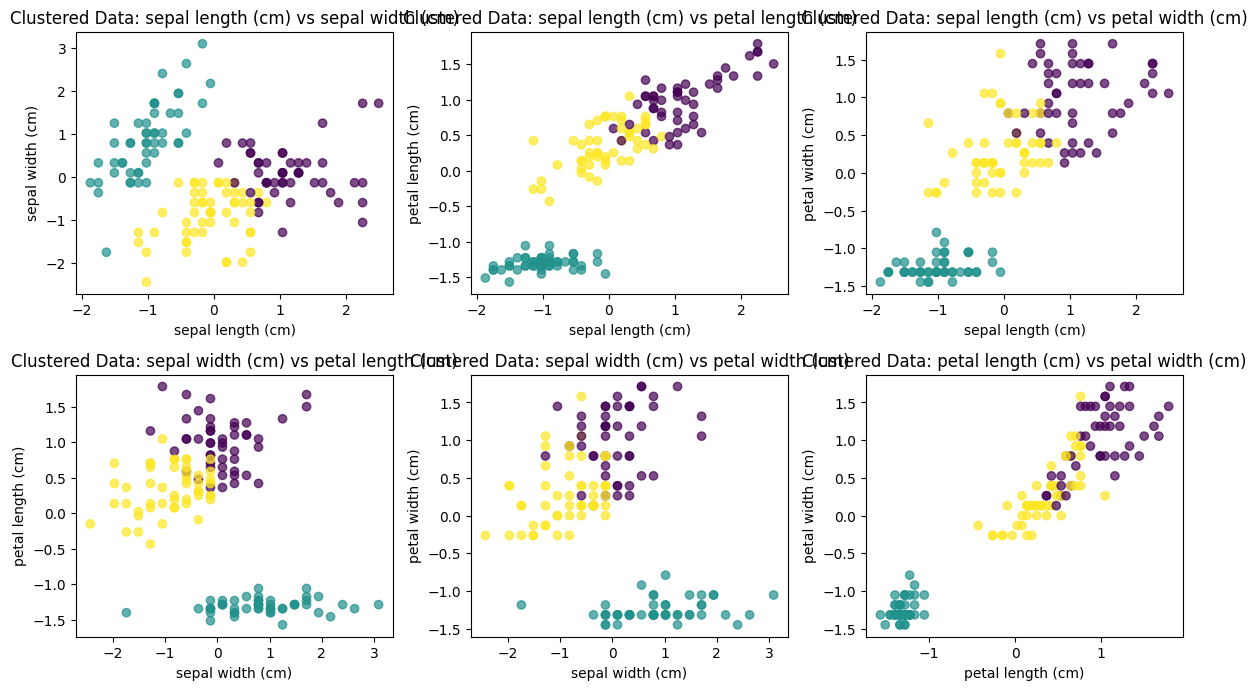

In [8]:
# MY ANSWER (continued):

# Assigning my code above to the school's given variable name "clustered_iris_data": 

clustered_iris_data = standardized_iris_with_clusters 


# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

In [9]:
'''MY ANSWER (continued): 

    In these distinctly-colored graphs we can clearly see 3 clusters. In real world, the Iris dataset is an exercise to cluster 3 iris species: 

        - Iris setosa: the green cluster, the SMALL SIZE iris - with short & narrow petal. 

        - Iris versicolor: the yellow cluster, the MEDIUM SIZE iris - with medium pedal width & length. 

        - Iris virginica: the purple cluster, the BIG SIZE iris - with long & wide petal. 

    Source: https://en.wikipedia.org/wiki/Iris_flower_data_set 
'''


'MY ANSWER (continued): \n\n    In these distinctly-colored graphs we can clearly see 3 clusters. In real world, the Iris dataset is an exercise to cluster 3 iris species: \n\n        - Iris setosa: the green cluster, the SMALL SIZE iris - with short & narrow petal. \n\n        - Iris versicolor: the yellow cluster, the MEDIUM SIZE iris - with medium pedal width & length. \n\n        - Iris virginica: the purple cluster, the BIG SIZE iris - with long & wide petal. \n\n    Source: https://en.wikipedia.org/wiki/Iris_flower_data_set \n'

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> MY ANSWER - based on UofT DSI's lecture sessions and notebook "Clustering.ipyn": 

> In real world, industry standard & best practice uses WSSD (Within-Cluster Sum of Squared Distances) formula together with ELBOW METHOD to choose OPTIMAL number of Clusters (K) - through SCIKIT-LEARN library syntax ".inertia_". 

> This method is helpful because by plotting the total WSSD against different values of k, we can look for the "elbow" point - the point where increasing the number of clusters (k) no longer leads to a significantly reduction in WSSD. 

> Note: Of course, selecting which point is the "elbow" point can also be subjective in some cases, and may need experienced advice depending on the nature of the study.

In [19]:
''' THE BELOW CODE IS NOT ASKED FOR IN THE QUESTION - BUT I WANT TO DEMO THIS FOR MY OWN COMPARISON. '''

' THE BELOW CODE IS NOT ASKED FOR IN THE QUESTION - BUT I WANT TO DEMO THIS FOR MY OWN COMPARISON. '

In [20]:
''' MY EXTRA WORK FOR PERSONAL PRACTICE: '''

# Utilising the WSSD code (given in notebook "Clustering.ipynb") for the Iris dataset: 

# Initialize an empty list to store the WSSD values
wssd_list = []

# Loop through values of k from 1 to 10 (feel free to adjust this range).
for k in range(1, 10): 

    # Perform K-means clustering
    elbow_kmeans = KMeans(n_clusters=k, random_state=12345)
    elbow_kmeans.fit(scaled_iris_df)

    
    # Append the WSSD (inertia) to the wssd_list
    wssd_list.append(elbow_kmeans.inertia_)

# Create a DataFrame
iris_clust_ks = pd.DataFrame({
    "k": range(1, 10),  # List of k values
    "wssd": wssd_list  # List of WSSD values from the loop
})

# Display the DataFrame
iris_clust_ks

c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\miniconda3\envs\DSI_participant\lib\site-packages\sklea

,k,wssd
0,1,600.000000
1,2,222.361705
2,3,139.825435
3,4,114.626860
4,5,105.079358
5,6,81.759697
6,7,73.880765
7,8,66.949126
8,9,58.628943


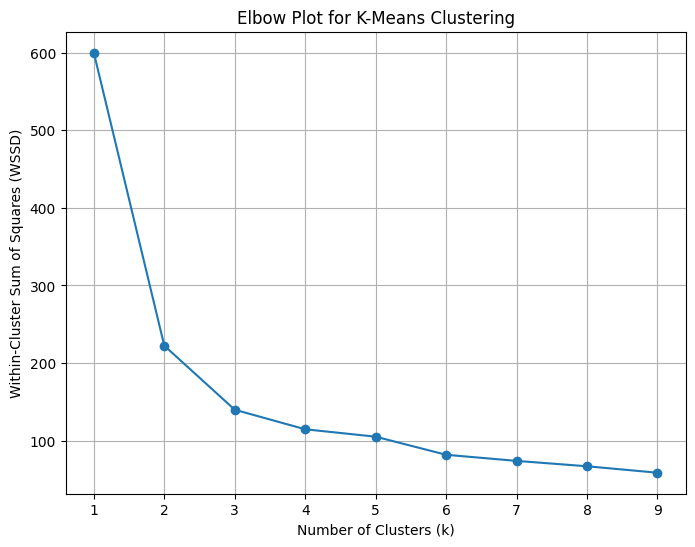

In [21]:
''' MY EXTRA WORK FOR PERSONAL PRACTICE (continued): '''

#  Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(iris_clust_ks['k'], iris_clust_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(iris_clust_ks['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

In [23]:
''' MY EXTRA WORK FOR PERSONAL PRACTICE (continued): 

Observation: Based on the WSSD ELBOW GRAPH, optimal number of clusters (k) can be 2 or 3. 

'''

' MY EXTRA WORK FOR PERSONAL PRACTICE (continued): \n\nObservation: Based on the WSSD ELBOW GRAPH, optimal number of clusters (k) can be 2 or 3. \n\n'

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [55]:
# MY ANSWER: 

'''NOTE: For BOOTSRAPPING, we use the UNSTANDARDIZED data - to estimate and intepret the true populations' scales, means and variability. '''

# Below codes utlize the codes given in UofT DSI notebook "Stat_Inference.ipynb": 

# Bootstrap sampling
np.random.seed(123) # set seed for reproducibility 
one_sample = iris_df.sample(n=40) # selecting a sample size of 40

# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []

for i in range(10000):
    sample = one_sample.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot10000 = pd.concat(bootstrap_samples)

# Display the combined DataFrame
# boot10000

# Calculate the mean petal width for each bootstrap sample (replicate)
boot_means = boot10000.groupby('replicate')['petal width (cm)'].mean().reset_index(name='mean_petal_width')
# boot_means

print(boot_means)



      replicate  mean_petal_width
0             0            1.2725
1             1            1.3400
2             2            1.1150
3             3            0.8750
4             4            1.1525
...         ...               ...
9995       9995            1.0975
9996       9996            1.3625
9997       9997            1.1925
9998       9998            1.2450
9999       9999            0.9750

[10000 rows x 2 columns]


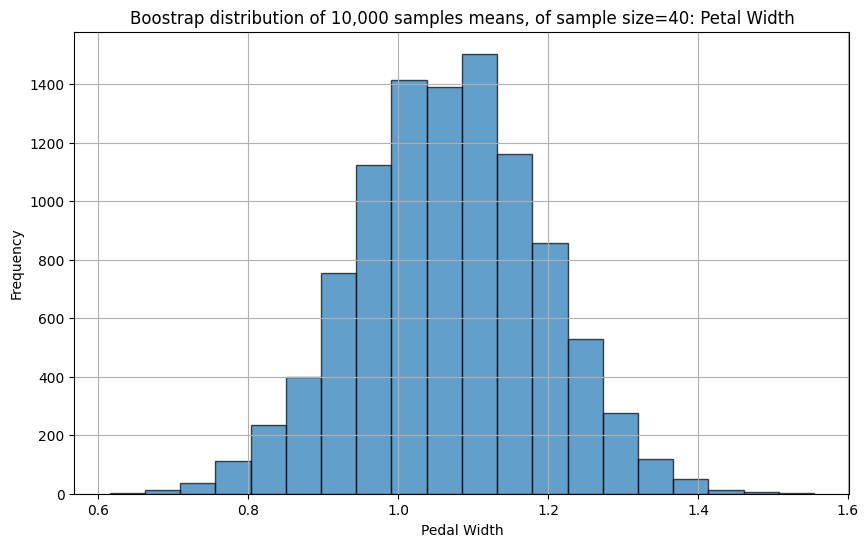

In [11]:
# MY ANSWER (continued)

# Below codes utlize the codes given in UofT DSI notebook "Stat_Inference.ipynb": 

# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_petal_width'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Boostrap distribution of 10,000 samples means, of sample size=40: Petal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [12]:
''' 
MY OBSERVATION: The graph has a BELL shape, centered around 1.1, and is normally distributed.

'''

' \nMY OBSERVATION: The graph has a BELL shape, centered around 1.1, and is normally distributed.\n\n'

In [13]:
# MY ANSWER (continued)

# Assigning my code to the variable names below, given by the school UofT DSI: 

mean_petal_width = np.mean(boot_means['mean_petal_width'])

# My answer below to calculate the lower and upper bounds: 
lower_bound  = np.percentile(boot_means['mean_petal_width'], 5)
upper_bound = np.percentile(boot_means['mean_petal_width'], 95)

# Display the result (code given by the school)
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: 1.067835
90% Confidence Interval of Mean Petal Width: (0.865, 1.27)


In [25]:
'''
MY ANSWER (continued)

The below work are not asked for in the question, but I'm just calculating the mean of the original dataset, and visualize the original dataset - for comparison. 
Although, obviously, in the real world there are more than 150 iris flowers. 
I am purely comparing the original dataset vs bootstrap (which should be closer to real world statistics).
'''

iris_df_petal_width_mean = iris_df['petal width (cm)'].mean() 

print(f'Original dataset - Mean of petal width: ', iris_df_petal_width_mean)

Original dataset - Mean of petal width:  1.1993333333333336


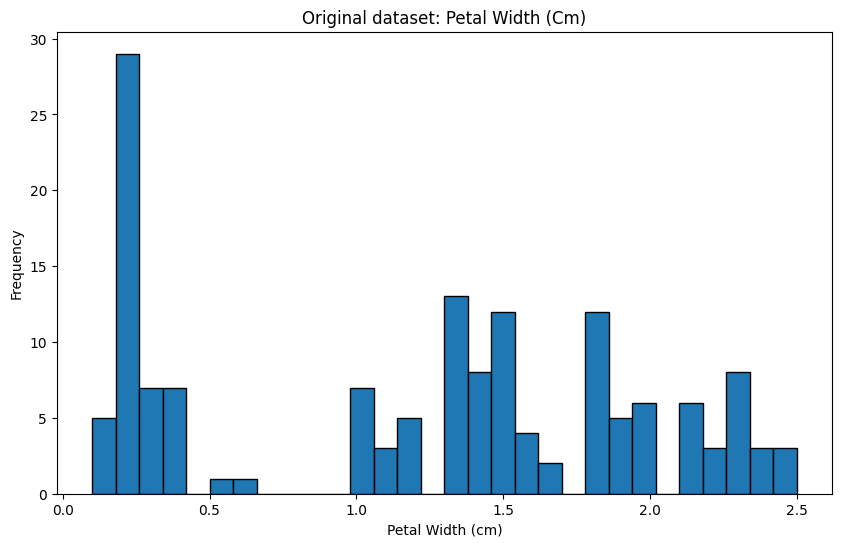

In [15]:
'''Plotting the original dataset's petal width.'''

# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(iris_df['petal width (cm)'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Original dataset: Petal Width (Cm)')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [27]:
'''
MY OBSERVATION: 
The graph above MAKES MORE SENSE to me, because, there are 3 different iris species (k=3), so there should be 3 bell shapes in the Bootstrap graph too. 

I would like to bootstrap the means for each of the 3 clusters. 

'''


'\nMY OBSERVATION: \nThe graph above MAKES MORE SENSE to me, because, there are 3 different iris species (k=3), so there should be 3 bell shapes in the Bootstrap graph too. \n\nI would like to bootstrap the means for each of the 3 clusters. \n\n'

In [30]:
''' MY EXTRA EXPLORATION WORK (continued): '''

# Count the number of observations per cluster
cluster_counts = standardized_iris_with_clusters['Cluster'].value_counts().sort_index()
print("Number of observations per cluster: ", cluster_counts)


Number of observations per cluster:  Cluster
0    48
1    50
2    52
Name: count, dtype: int64


In [56]:
''' MY EXTRA EXPLORATION WORK (continued): 

For BOOTSRAPPING, we use the UNSTANDARDIZED data - to estimate and intepret the true populations' scales, means and variability. '''


# Utilizing and modifying the code in notebook "Clustering.ipynb" and "Stat_Inference.ipynb" given by the school: 

# Create a copy of the UNSTANDARDIZED DataFrame for clustering and modification
iris_with_clusters = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].copy()

# Add cluster labels to the copied DataFrame
iris_with_clusters['Cluster'] = clusters.labels_

# Initialize an empty list to store bootstrap samples
bootstrap_clusters_samples = []

# Perform bootstrapping for each cluster
for cluster in range(3):
    cluster_data = iris_with_clusters[iris_with_clusters['Cluster'] == cluster]
    
    for i in range(10000):
        sample = cluster_data.sample(frac=1, replace=True)  # Sample with replacement
        sample = sample.assign(replicate=i)  # Add replicate number
        bootstrap_clusters_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot_clusters_10000 = pd.concat(bootstrap_clusters_samples)

# Calculate the mean petal width for each bootstrap sample (replicate)
boot_clusters_means = boot_clusters_10000.groupby(['Cluster', 'replicate'])['petal width (cm)'].mean().reset_index(name='mean_petal_width')

# Display bootstrap results for each cluster
for cluster in range(3):
    cluster_boot_means = boot_clusters_means[boot_clusters_means['Cluster'] == cluster]['mean_petal_width']
    lower_bound, upper_bound = np.percentile(cluster_boot_means, [5, 95])
    print(f"Cluster {cluster}:")
    print(f"  Mean Petal Width: {cluster_boot_means.mean()}")
    print(f"  90% Confidence Interval: ({lower_bound}, {upper_bound})")




Cluster 0:
  Mean Petal Width: 1.958953958333333
  90% Confidence Interval: (1.8791666666666667, 2.0395833333333333)
Cluster 1:
  Mean Petal Width: 0.2459672
  90% Confidence Interval: (0.222, 0.27009999999999856)
Cluster 2:
  Mean Petal Width: 1.4155203846153845
  90% Confidence Interval: (1.3461538461538463, 1.4865384615384616)


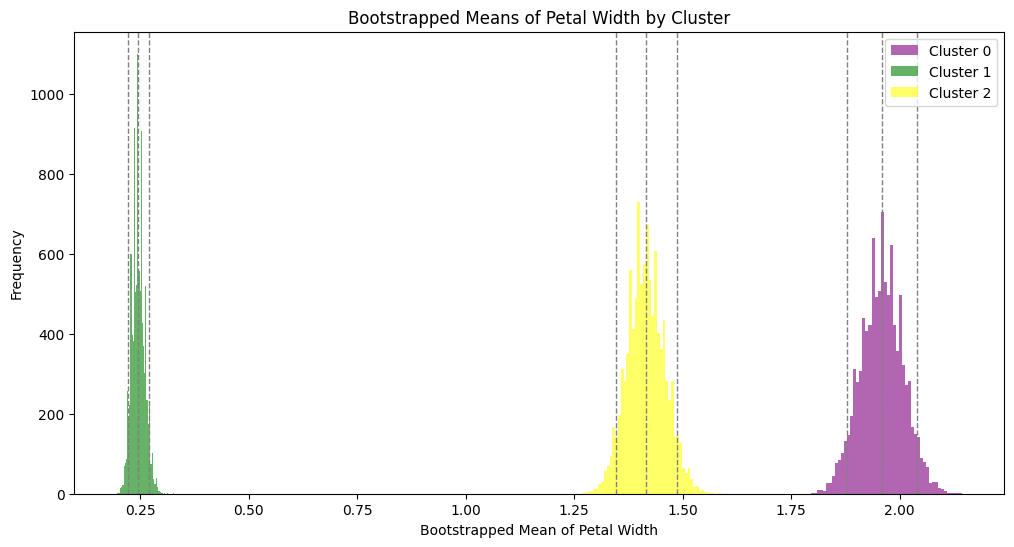

In [62]:
''' MY EXTRA EXPLORATION WORK (continued): 
Disclaimer: The code below is BY THE HELP OF LLM - as I could not find any sample code online (e.g., stackoverflow) to create Histogram of clusters. 
And I am only doing these extra work outside of the assignment's questions for my own exploration.
'''

# Define the colors to align with the graphs above: 
cluster_colors = {0: 'purple', 1: 'green', 2: 'yellow'}

# For aesthetic purposes: 
plt.figure(figsize=(12,6))

# Plot 


# Plot bootstrapped means and their confidence intervals
for cluster in range(3):
    means = boot_clusters_means[boot_clusters_means['Cluster'] == cluster]['mean_petal_width']
    lower_bound, upper_bound = np.percentile(means, [5, 95])

    # Plot the bootstrapped means
    plt.hist(means, bins=50, alpha=0.6, color=cluster_colors[cluster], label=f'Cluster {cluster}')
    
    # Plot the mean and confidence interval
    plt.axvline(np.mean(means), color='gray', linestyle='dashed', linewidth=1)
    plt.axvline(lower_bound, color='gray', linestyle='dashed', linewidth=1)
    plt.axvline(upper_bound, color='gray', linestyle='dashed', linewidth=1)

# Add titles and labels
plt.title('Bootstrapped Means of Petal Width by Cluster')
plt.xlabel('Bootstrapped Mean of Petal Width')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  MY ANSWER: 

> We use bootstrapping because in the real world, there are more than 150 iris flowers. Bootstrapping allows us to 're-sample' from the data we already have - in this case, we re-sampled it 10,000 times - allowing us to build a distribution of possible estimates. This helps us understand how much our estimate might vary and give us a range of likely values, which we can use to assess the uncertainty around our sample estimate.  

> In other words, bootstrap helps us get a sense of the point estimate's variability. Because we are resampling from the original sample repeatedly, we see that the bootstrap distribution is centered at the original sample’s mean value, around 1.1 (rounded to the nearest 1 decimal). 

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> MY ANSWER: 

> We created a 90% confidence interval of the mean petal width: (0.865, 1.27). 

> This means that likely 90% of the true iris population would have petal width between 0.865 cm and 1.27 cm, based on our original sample of 150 observations and bootstrapping.


**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> MY ANSWER: 

> Our bootstrapped mean is 1.068 (rounded to the nearest 3 decimal places) with 90% confidence interval of (0.865, 1.27). Since the lower and upper bounds both less than 20% difference than the mean: the MEAN of the petal width appears to be stable and reliable estimate.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
